# 선형회귀 모델 (자치구별)

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. 데이터 불러오기

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,...,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177,1001496,11680,강남구
1,1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257,1001495,11710,송파구
2,2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362,1001494,11110,종로구
3,3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308,1001493,11140,중구
4,4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080,1001492,11140,중구


In [16]:
# (row, column)

df.shape

(32912, 14)

In [17]:
# 결측치 확인

df.isnull().sum().sum()

0

In [91]:
# column 확인

df.columns

Index(['기준_년_코드', '기준_분기_코드', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률', '상권_코드', '시군구_코드',
       '자치구_명'],
      dtype='object')

In [20]:
# 필요한 column 추출

df = df[['기준_년_코드', '기준_분기_코드', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '총 상주인구 수', '집객시설_수',
       '당월_매출_금액', '총_직장_인구_수', '폐업률', '상권_코드', '시군구_코드', '자치구_명']]

In [21]:
df.head()

,기준_년_코드,기준_분기_코드,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,2020.0,2.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177,1001496,11680,강남구
1,2020.0,2.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257,1001495,11710,송파구
2,2020.0,2.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362,1001494,11110,종로구
3,2020.0,2.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308,1001493,11140,중구
4,2020.0,2.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080,1001492,11140,중구


In [23]:
# 자치구 종류

df['자치구_명'].unique()

array(['강남구', '송파구', '종로구', '중구', '용산구', '강동구', '서초구', '관악구', '동작구',
       '영등포구', '금천구', '구로구', '강서구', '양천구', '마포구', '서대문구', '은평구', '노원구',
       '도봉구', '강북구', '성북구', '중랑구', '동대문구', '광진구', '성동구'], dtype=object)

In [39]:
# '강남구'만 우선 추출

df_0 = df[df['자치구_명'] == '강남구']

In [92]:
df_0.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.000000,1.671959e+11,15904.0,2.587177
20,45750.0,14.48,82.273333,2.942853e+08,7.0,4.000000,3.526016e+09,138.0,2.941176
21,284809.0,1.00,67.000000,6.392237e+08,241.0,7.000000,1.162736e+10,57.0,0.000000
22,43891.0,14.48,82.273333,2.942853e+08,171.0,3.000000,2.568207e+09,48.0,2.272727
23,42987.0,3.00,115.000000,5.125152e+08,85.0,37.766667,3.596760e+09,85.0,5.882353


## 2. 데이터 전처리
### (1) 데이터 정규화

In [41]:
# 종속변수 : 폐업률, 독립변수 : 총 유동인구 수 ~ 총 직장인구 수

df_0 = df_0[df_0.columns[2:11]]
df_0

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.000000,1.671959e+11,15904.000000,2.587177
20,45750.0,14.48,82.273333,2.942853e+08,7.0,4.000000,3.526016e+09,138.000000,2.941176
21,284809.0,1.00,67.000000,6.392237e+08,241.0,7.000000,1.162736e+10,57.000000,0.000000
22,43891.0,14.48,82.273333,2.942853e+08,171.0,3.000000,2.568207e+09,48.000000,2.272727
23,42987.0,3.00,115.000000,5.125152e+08,85.0,37.766667,3.596760e+09,85.000000,5.882353
...,...,...,...,...,...,...,...,...,...
32729,69530.0,2.00,85.000000,4.174821e+08,303.0,7.000000,2.036024e+10,651.620000,7.526882
32734,106973.0,3.00,45.000000,2.727871e+08,255.0,3.000000,6.687462e+09,665.326667,8.000000
32833,74422.0,1.00,95.000000,2.985106e+08,287.0,17.180000,3.516268e+09,651.320000,2.040816
32834,23840.0,3.00,115.000000,4.175348e+08,85.0,17.400000,6.045909e+07,663.593333,0.000000


In [42]:
# min-max scaling 진행

df_0_n = df_0.copy()
for col in df_0_n.columns:
    if col == '폐업률':
        pass
    else:
        df_0_n[col] = minmax_scaling(df_0[col], columns=[0])

In [43]:
# 결과 확인

df_0_n

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0.019339,0.089867,0.343231,0.094786,0.003239,0.125616,0.586431,0.276495,2.587177
20,0.009519,0.089867,0.343231,0.094786,0.000945,0.007389,0.012285,0.001812,2.941176
21,0.061924,0.000000,0.265306,0.244886,0.032528,0.014778,0.040704,0.000401,0.000000
22,0.009112,0.089867,0.343231,0.094786,0.023080,0.004926,0.008925,0.000244,2.272727
23,0.008914,0.013333,0.510204,0.189749,0.011473,0.090558,0.012533,0.000889,5.882353
...,...,...,...,...,...,...,...,...,...
32729,0.014732,0.006667,0.357143,0.148395,0.040896,0.014778,0.071339,0.010760,7.526882
32734,0.022940,0.013333,0.153061,0.085431,0.034418,0.004926,0.023376,0.010999,8.000000
32833,0.015805,0.000000,0.408163,0.096625,0.038737,0.039852,0.012251,0.010755,2.040816
32834,0.004717,0.013333,0.510204,0.148418,0.011473,0.040394,0.000128,0.010969,0.000000


## 3. Model_1 : 독립변수 전부 사용
### (1) 모델링

In [44]:
X = df_0_n.drop('폐업률', axis = 1)
y = df_0_n['폐업률']

In [45]:
# 학습 데이터, 검증 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [46]:
# 모델 생성
Model_1 = LinearRegression()

# 모델 학습
Model_1 = Model_1.fit(X_train, y_train)

In [47]:
# 회귀 계수
Model_1.coef_

array([-0.12804355, -0.34695736,  0.94597037, -2.44761604,  0.80706348,
       -0.3598252 ,  0.57767509, -0.21310847])

In [48]:
# 회귀 절편
Model_1.intercept_

3.4331441186892326

### (2) 성능 확인

In [49]:
# 검증 데이터 예측

y_predict = Model_1.predict(X_test)

In [50]:
# 실제값 : 예측값 비교

y_compare = {'y_test' : y_test, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
14712,0.537634,3.536942
9380,5.405405,3.645535
29507,5.785124,3.565587
19945,3.309481,3.669674
31806,7.092199,3.417376
...,...,...
21454,4.878049,3.543447
17245,3.833866,3.604679
15888,2.933333,3.503324
29330,1.666667,3.533374


Text(0.5, 1.0, 'y_predict & y_test')

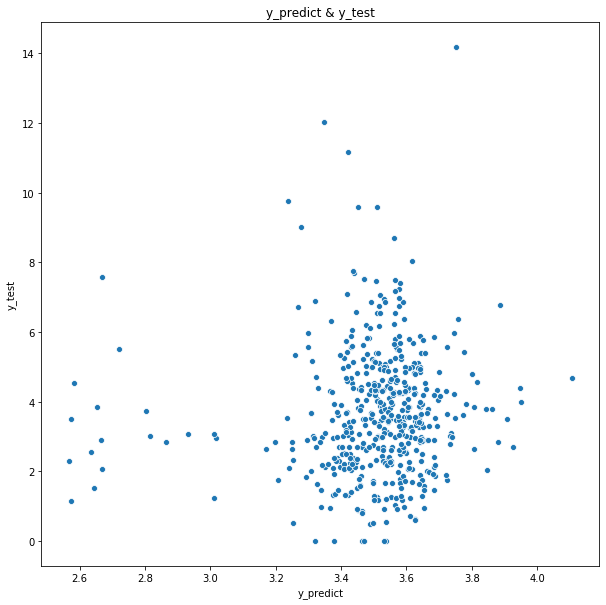

In [51]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('y_predict & y_test')

In [52]:
# 훈련 데이터 결정계수(R-Squared)

Model_1.score(X_train, y_train)

0.014246497844213946

In [53]:
# 검증 데이터 결정계수(R-Squared)

Model_1.score(X_test, y_test)

-0.006709638327408118

In [57]:
# 훈련 데이터 RMSE
y_pred = Model_1.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.754378149855431

In [58]:
# 검증 데이터 RMSE
y_pred = Model_1.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.8158277296954015

## 4. Model_2 : 다중공선성 제거 후 모델링
### (1) 다중공선성 확인

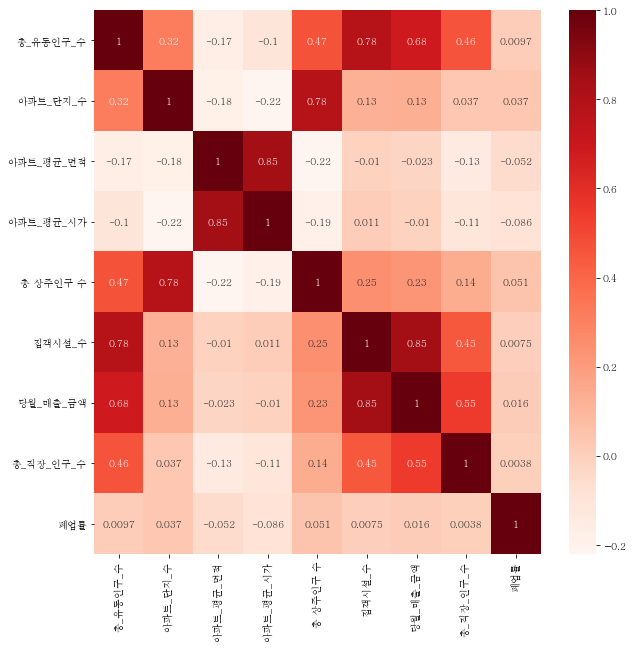

In [59]:
# 변수간 상관관계 히트맵

plt.rc('font', family='Batang')
plt.figure(figsize = (10,10))
sns.heatmap(df_0_n.corr(), annot = True, cmap = 'Reds')

- 변수간 상관관계가 높은 경우 존재  
- 상관관계가 높은 변수들을 제거하여 모델의 성능을 높임

In [62]:
# VIF(분산 팽창 요인) 계산

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_0_n.values, i) for i in range(df_0_n.shape[1])]
vif["features"] = df_0_n.columns
vif

,VIF Factor,features
0,5.439645,총_유동인구_수
1,6.107934,아파트_단지_수
2,12.128356,아파트_평균_면적
3,6.768675,아파트_평균_시가
4,7.446813,총 상주인구 수
5,6.846707,집객시설_수
6,5.753266,당월_매출_금액
7,2.098910,총_직장_인구_수
8,3.770918,폐업률


- VIF Factor가 10 이상 >> 위험
- VIF Factor가 5 이상 >> 주의
- '아파트 평균 면적' column 제거 후 다시 계산

In [64]:
df_0_n_2 = df_0_n.drop('아파트_평균_면적', axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_0_n_2.values, i) for i in range(df_0_n_2.shape[1])]
vif["features"] = df_0_n_2.columns
vif

,VIF Factor,features
0,5.383415,총_유동인구_수
1,5.806544,아파트_단지_수
2,1.624858,아파트_평균_시가
3,7.441309,총 상주인구 수
4,6.832815,집객시설_수
5,5.749486,당월_매출_금액
6,2.082230,총_직장_인구_수
7,2.644061,폐업률


### (2) 모델링

In [66]:
# 데이터 분할

X = df_0_n_2.drop('폐업률', axis = 1)
y = df_0_n_2['폐업률']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 2)

# 모델 학습

Model_2 = LinearRegression()
Model_2 = Model_2.fit(X_train_2, y_train_2)

In [67]:
# 회귀 계수

Model_2.coef_

array([-0.27681919, -0.25190143, -1.51020032,  0.72151929, -0.26480943,
        0.59803442, -0.22581405])

In [68]:
# 회귀식 절편

Model_2.intercept_

3.5965870582945745

### (3) 성능 확인

In [69]:
# 검증 데이터 예측

y_predict = Model_2.predict(X_test_2)

# 실제값 : 예측값 비교

y_compare = {'y_test' : y_test_2, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
14712,0.537634,3.557266
9380,5.405405,3.690200
29507,5.785124,3.618109
19945,3.309481,3.727839
31806,7.092199,3.433653
...,...,...
21454,4.878049,3.548538
17245,3.833866,3.648222
15888,2.933333,3.541666
29330,1.666667,3.551162


Text(0.5, 1.0, 'y_predict & y_test')

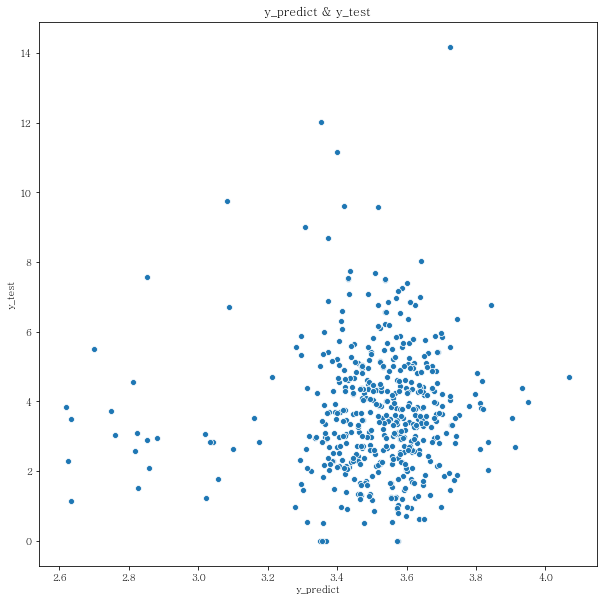

In [70]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('y_predict & y_test')

In [71]:
# 훈련 데이터 결정계수(R-Squared)

Model_2.score(X_train_2, y_train_2)

0.012949490612533698

In [72]:
# 검증 데이터 결정계수(R-Squared)

Model_2.score(X_test_2, y_test_2)

-0.010098795908302982

In [73]:
# 훈련 데이터 RMSE

y_pred = Model_2.predict(X_train_2)
np.sqrt(mean_squared_error(y_train_2, y_pred))

1.7555319338163198

In [74]:
# 검증 데이터 RMSE

y_pred = Model_2.predict(X_test_2)
np.sqrt(mean_squared_error(y_test_2, y_pred))

1.8188817162716115

- Model_1과 성능이 비슷함

# 5. Model_3 : 변수선택 알고리즘 적용
### (1) 변수선택 알고리즘 정의

In [77]:
import time
import itertools 

def processSubset(X,y,feature_set):
    model = LinearRegression()
    regr = model.fit(X[list(feature_set)], y) 
    y_pred = regr.predict(X_test_3[list(feature_set)])
    rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))
    return {"model" : regr, "rmse" : rmse, "features" : feature_set}

def getBest(X,y,k):
    results = []
    for combo in itertools.combinations(X.columns, k) :
        
        combo = (list(combo))  
        results.append(processSubset(X,y,feature_set = combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['rmse'].argmin()]
    toc = time.time()
    print("Processed", models.shape[0], "predictors")
    
    return best_model

- RMSE가 가장 낮은 모델 반환

### (2) 모델링

In [78]:
X = df_0_n.drop('폐업률', axis = 1)
y = df_0_n['폐업률']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [80]:
# 독립변수 개수 1 ~ 8에 따른 모델 성능

re_list = []
for k in range(1,9):
    re = getBest(X_train_3, y_train_3, k)
    re_list.append(re)
k = [i for i in range(1,9)]
model_df = pd.DataFrame(re_list, k)
model_df

Processed 8 predictors
Processed 28 predictors
Processed 56 predictors
Processed 70 predictors
Processed 56 predictors
Processed 28 predictors
Processed 8 predictors
Processed 1 predictors


,model,rmse,features
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.815918,[총_직장_인구_수]
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.813821,"[아파트_평균_면적, 아파트_평균_시가]"
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.813846,"[아파트_평균_면적, 아파트_평균_시가, 총_직장_인구_수]"
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.814355,"[아파트_평균_면적, 아파트_평균_시가, 집객시설_수, 총_직장_인구_수]"
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.814973,"[아파트_평균_면적, 아파트_평균_시가, 집객시설_수, 당월_매출_금액, 총_직장_..."
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.814920,"[총_유동인구_수, 아파트_단지_수, 아파트_평균_면적, 아파트_평균_시가, 총 상..."
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.815083,"[총_유동인구_수, 아파트_단지_수, 아파트_평균_면적, 아파트_평균_시가, 총 상..."
8,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.815828,"[총_유동인구_수, 아파트_단지_수, 아파트_평균_면적, 아파트_평균_시가, 총 상..."


- RMSE가 가장 낮은 2번 모델 선택

In [82]:
Model_3 = model_df.loc[2,'model']

In [83]:
# 회귀 계수

Model_3.coef_

array([ 0.75925428, -2.35816529])

In [84]:
# 회귀식 절편

Model_3.intercept_

3.5787562017348136

### (3) 성능 확인

In [85]:
f = model_df.loc[2,'features']

In [86]:
# 훈련 데이터 결정계수(R-Squared)

Model_3.score(X_train_3[f], y_train_3)

0.010531798920817681

In [87]:
# 검증 데이터 결정계수(R-Squared)

Model_3.score(X_test_3[f], y_test_3)

-0.004485368566813586

In [88]:
# 훈련 데이터 RMSE

y_pred = Model_3.predict(X_train_3[f])
np.sqrt(mean_squared_error(y_train_3, y_pred))

1.7576806278696189

In [89]:
# 검증 데이터 RMSE

y_pred = Model_3.predict(X_test_3[f])
np.sqrt(mean_squared_error(y_test_3, y_pred))

1.8138206345258383